# TUMOR - CNR - TOWARD HISTOGRAM ANALYSIS - CC2 SUBJECT


Created: 2021.11.10 / Updated: 2021.12.02

ver: 0.02

- standarize ROI colors in images and histograms

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import os
import pathlib
import glob

import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt

In [3]:
import utils
import functions1 as f1

# GLOBAL VARIABLES

In [4]:
HOME_DIR = pathlib.Path(os.getcwd()).parent
DATA_DIR = HOME_DIR / 'data'
RESULTS_DIR = DATA_DIR / 'results'
PLOT_DIR = DATA_DIR / 'plots'
TABLE_DIR = DATA_DIR / 'tables'

CURRENT_NOTEBOOK_NAME = 'cnr-04-cc2'
CURRENT_NOTEBOOK_NUMBER = CURRENT_NOTEBOOK_NAME.split('-')[1]

---

# GET LIST ALL CC2 IMAGES

In [5]:
SUB = 'CC2'

In [6]:
files = list(RESULTS_DIR.glob(f"*{SUB}*.nii.gz"))
files

[PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/results/CC2_t2_roi.nii.gz'),
 PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/results/CC2_t2_bladder.nii.gz'),
 PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/results/CC2_t2.nii.gz'),
 PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/results/CC2_t2_roi_dilated_ball3.nii.gz'),
 PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/results/CC2_t2_roi_cm.nii.gz'),
 PosixPath('/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/results/CC2_t2_roi_dilated2.nii.gz')]

In [7]:
# print only names
_ = [print(f'{k+1}) {f.name}') for k, f in enumerate(sorted(files))]

1) CC2_t2.nii.gz
2) CC2_t2_bladder.nii.gz
3) CC2_t2_roi.nii.gz
4) CC2_t2_roi_cm.nii.gz
5) CC2_t2_roi_dilated2.nii.gz
6) CC2_t2_roi_dilated_ball3.nii.gz


## LOAD ALL IMAGES

In [8]:
# image
img = nib.load(RESULTS_DIR / f'{SUB}_t2.nii.gz').get_fdata()
# roi
roi = nib.load(RESULTS_DIR / f'{SUB}_t2_roi.nii.gz').get_fdata()
# dilated 2
dil2 = nib.load(RESULTS_DIR / f'{SUB}_t2_roi_dilated2.nii.gz').get_fdata()
# ball3
bal3 = nib.load(RESULTS_DIR / f'{SUB}_t2_roi_dilated_ball3.nii.gz').get_fdata()
# bladder
bla = nib.load(RESULTS_DIR / f'{SUB}_t2_bladder.nii.gz').get_fdata()

### CREATE LIST OFLOADED IMAGES AND LIST OF THEIR NAMES

In [9]:
masks = [dil2, bal3]
names = ['dil2', 'bal3']

# only dil and bal images; neither img nor roi
MASKS_CNT = len(masks)

### BASIC INFO ABOUT IMAGES

In [10]:
f1.im_info(img, 'img')
f1.im_info(roi, 'roi')
f1.im_info(bla, 'bladder')
print()
for i,n in zip(masks, names):
    f1.im_info(i,name=n)

*** IMG ***,	max=1771.0, min=0.0, mean=336.25, shape=(384, 384, 28), #voxels=4128768
*** ROI ***,	max=1.0, min=0.0, mean=0.00, shape=(384, 384, 28), #voxels=4128768
*** BLADDER ***,	max=1.0, min=0.0, mean=0.00, shape=(384, 384, 28), #voxels=4128768

*** DIL2 ***,	max=1.0, min=0.0, mean=0.00, shape=(384, 384, 28), #voxels=4128768
*** BAL3 ***,	max=1.0, min=0.0, mean=0.00, shape=(384, 384, 28), #voxels=4128768


### DISPLAY ALL MASKS OVERLAYED ON IMAGE AND ROI FOR SELECTED SLICE

Figure saved to:
	/home/marek/Dropbox/p1ext4_P/no_work/TUMOR-CNR/tumor-cnr-git/data/plots/04-CC2-roi-and-dilated-masks.png


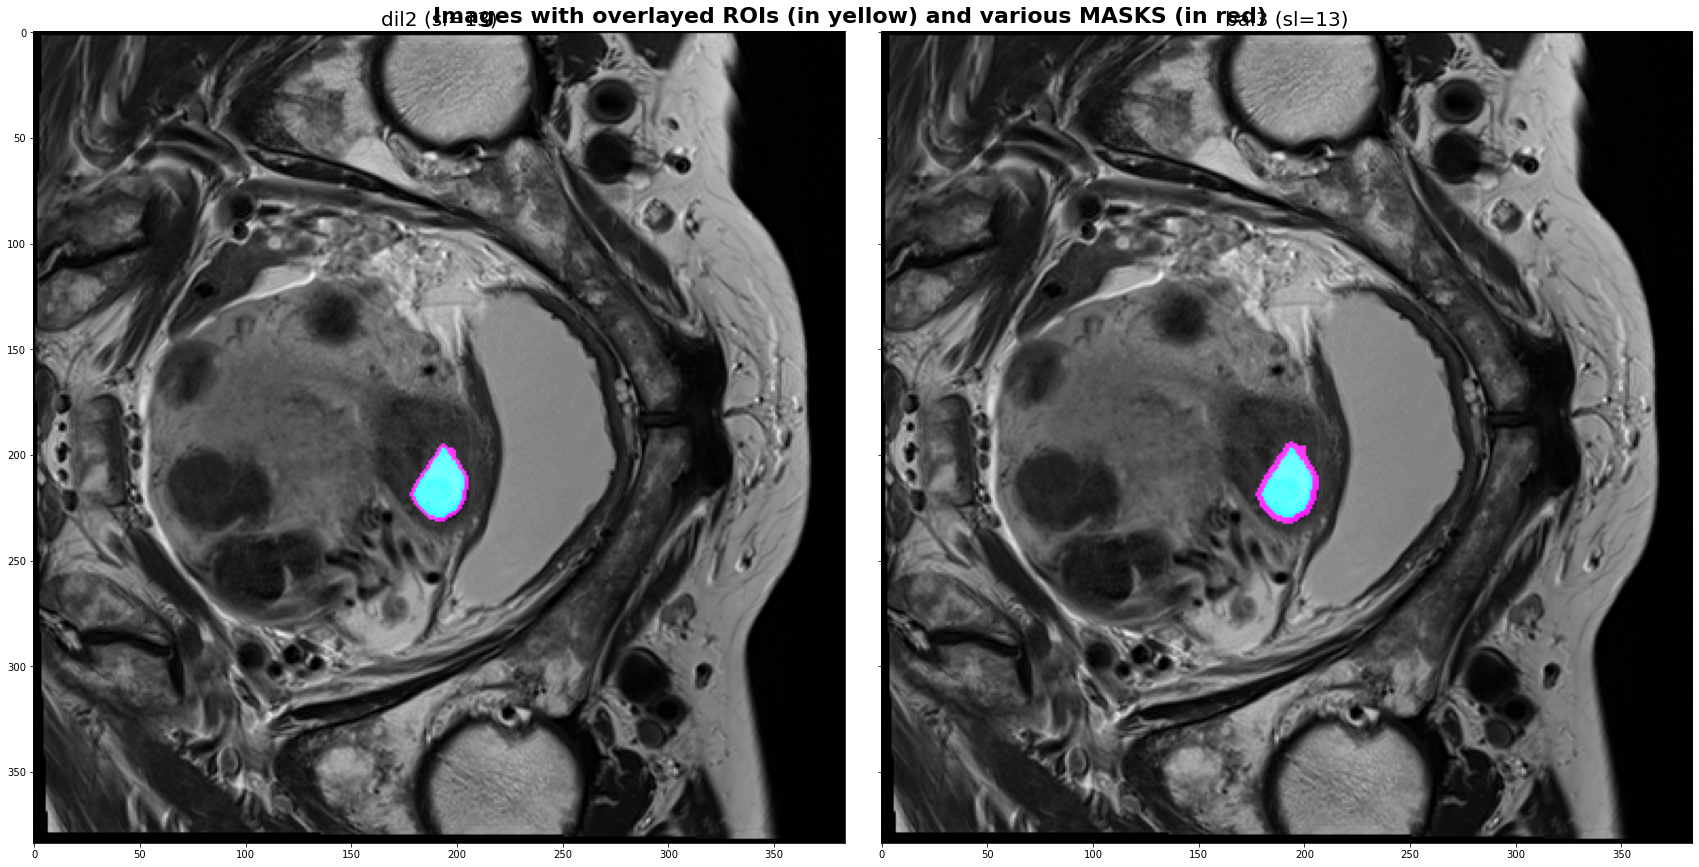

In [11]:
f,ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(24,12))

title = 'Images with overlayed ROIs (in yellow) and various MASKS (in red)'
f1.show_images_from_list2(ax, img, roi, masks_lst=masks, names_lst=names, slice_nr=13, title=title, fontsize=22)
    
f.tight_layout()

save_name = PLOT_DIR / f'{CURRENT_NOTEBOOK_NUMBER}-{SUB}-roi-and-dilated-masks.png' 
print(f'Figure saved to:\n\t{save_name}')
plt.savefig(save_name)

plt.show()   

# PLOT HISTOGRAMS FOR ALL MASKS

Saved figure:
	../data/plots/04-CC2-dil2.png


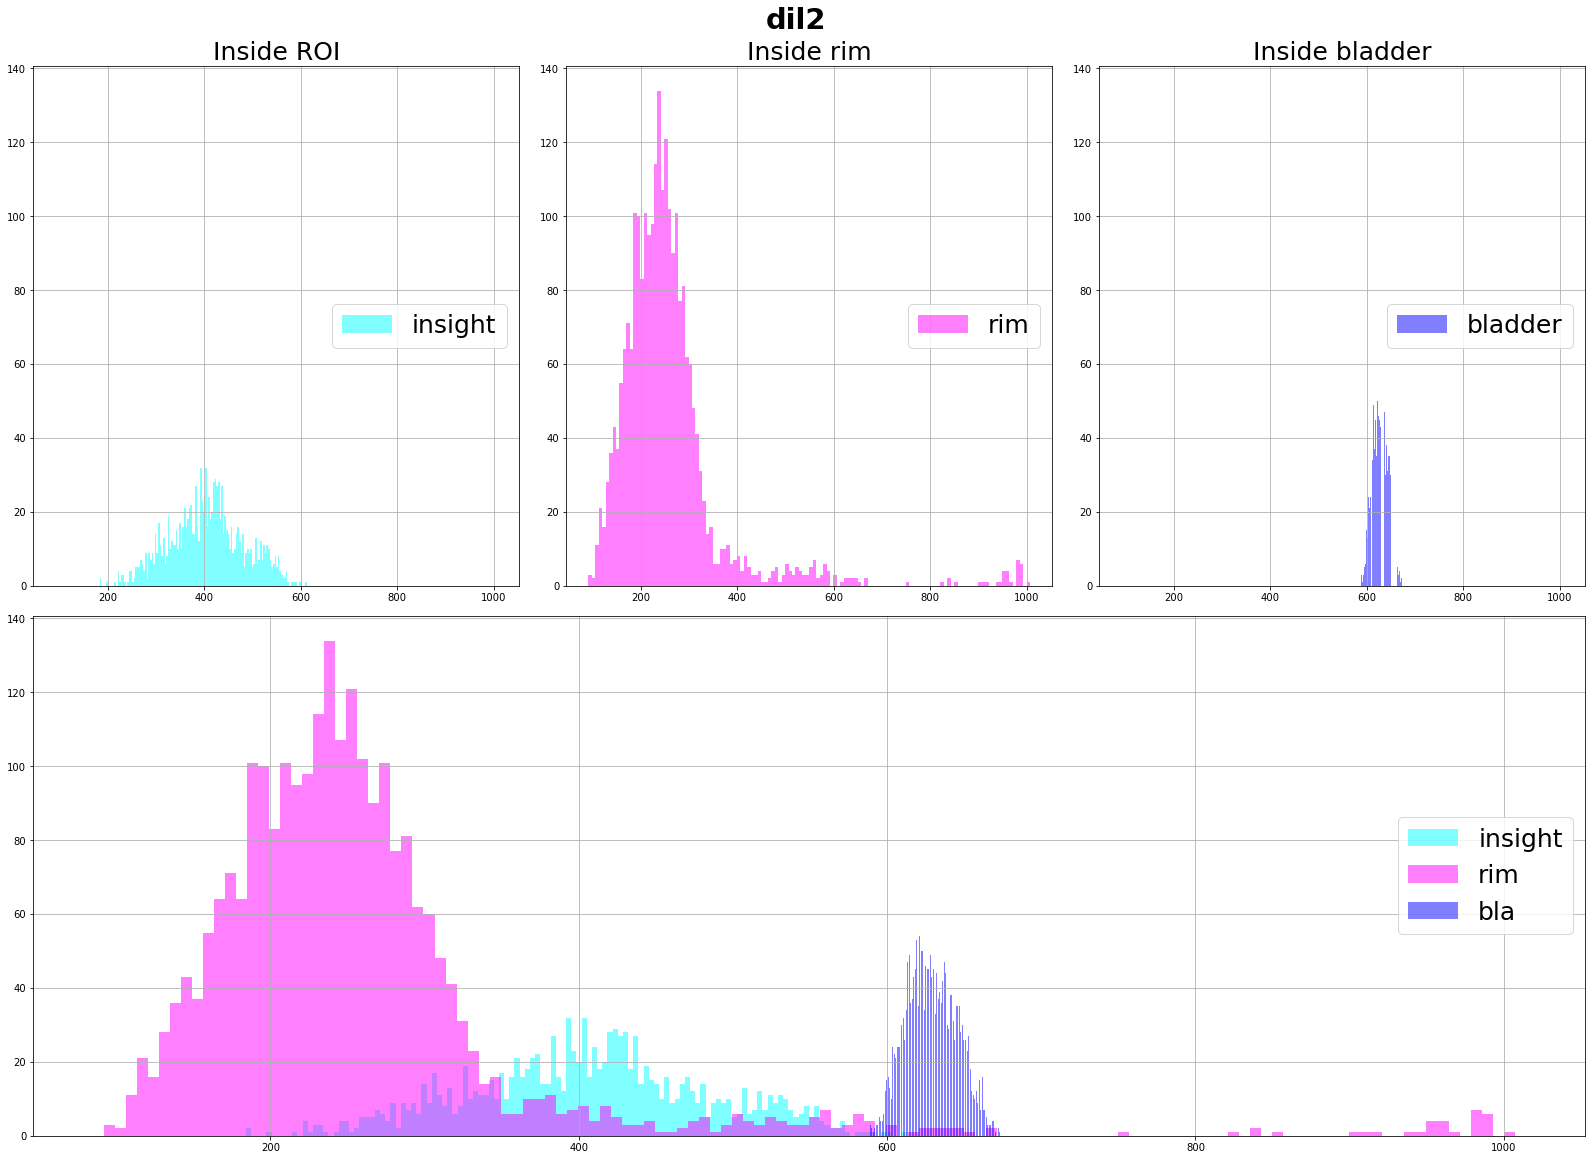

********************************************************************************
Saved figure:
	../data/plots/04-CC2-bal3.png


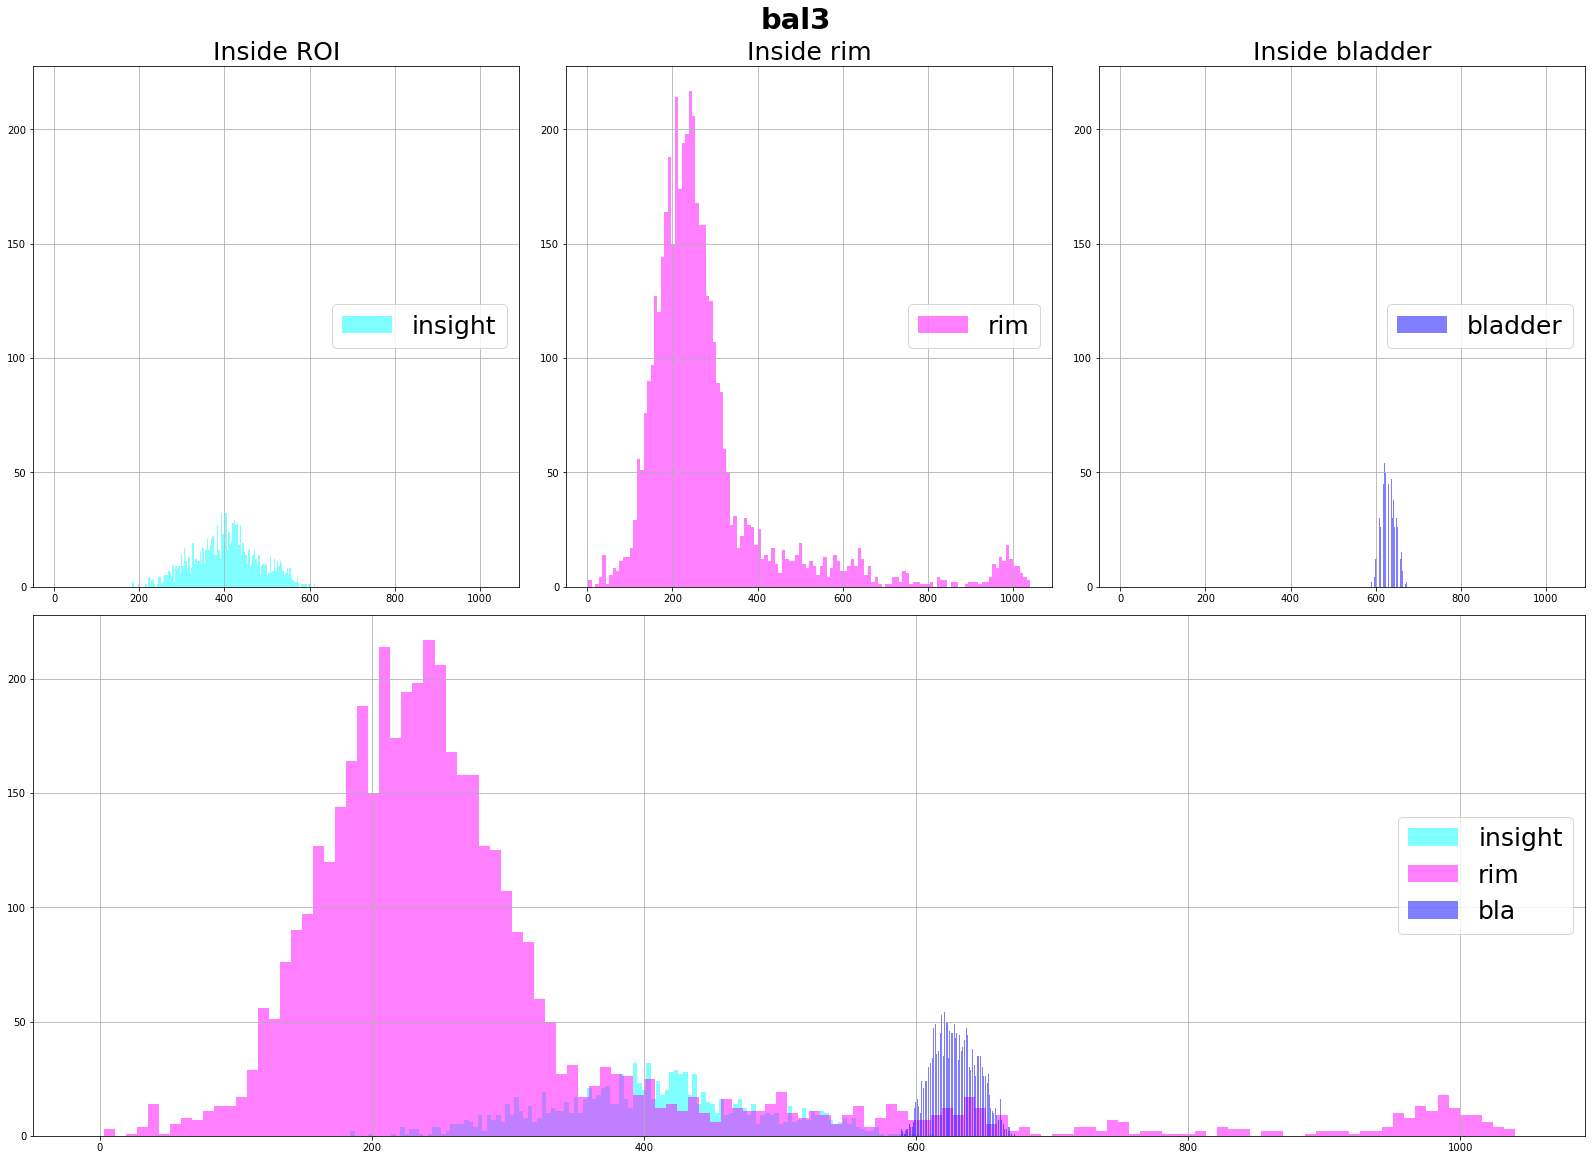

********************************************************************************


In [12]:
# voxels inside ROI only (fullsize)
voxels_inside_roi = np.where(roi, img, 0)
voxels_inside_bla = np.where(bla, img, 0)

for mask, name in zip(masks, names):    
    mask_of_rim = mask - roi
    voxels_inside_rim = np.where(mask_of_rim, img, 0)
        
    f1.plot_3_histograms_separately(voxels_inside_roi, voxels_inside_rim, voxels_inside_bla, legendloc=7, title=name,sub=SUB, save=True,
                                    notebook_nr=CURRENT_NOTEBOOK_NUMBER)
    print(80*'*')

In [13]:
utils.print_date(5)

02-Dec-2021 19:15:11


In [14]:
utils.save_notebook_as_html(file_name=CURRENT_NOTEBOOK_NAME, cleaning_delay=2)

In [15]:
utils.save_notebook_as_pdf(file_name=CURRENT_NOTEBOOK_NAME, cleaning_delay=2)